In [13]:
import numpy as np
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pickle

In [14]:
df_review=pd.read_csv('/Users/nicolerodriguez/gwcla/data/2020-2021_Demographic_Snapshot_School_20241028.csv')

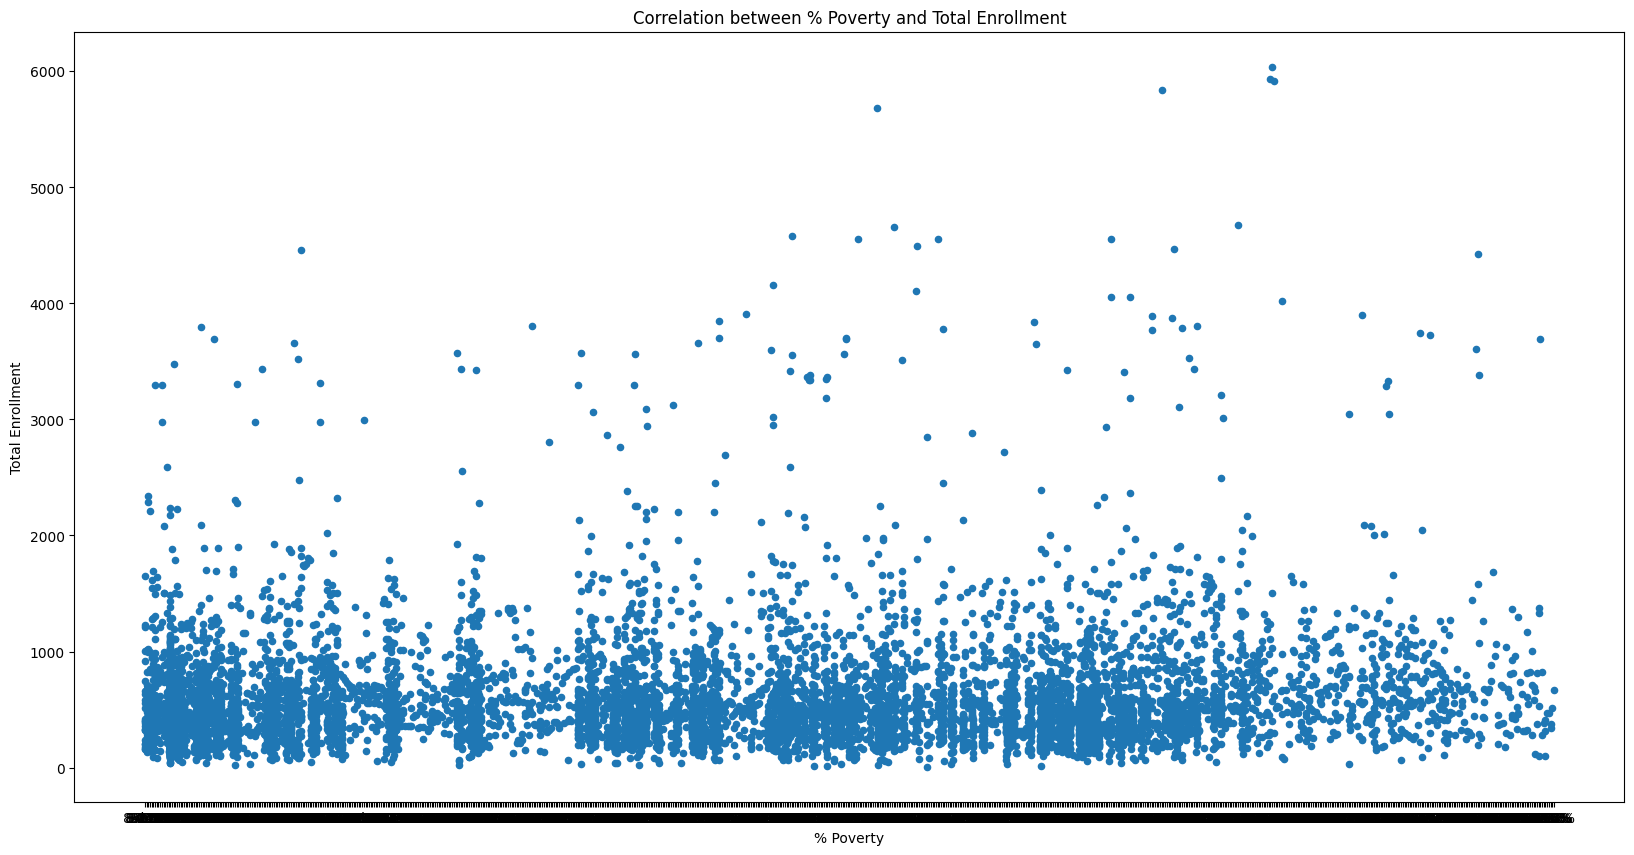

In [15]:
df_review.plot(kind='scatter', x = '% Poverty', y = 'Total Enrollment', figsize = (20, 10))
plt.title('Correlation between % Poverty and Total Enrollment')

plt.show()

In [16]:
df_review2 = df_review.copy()


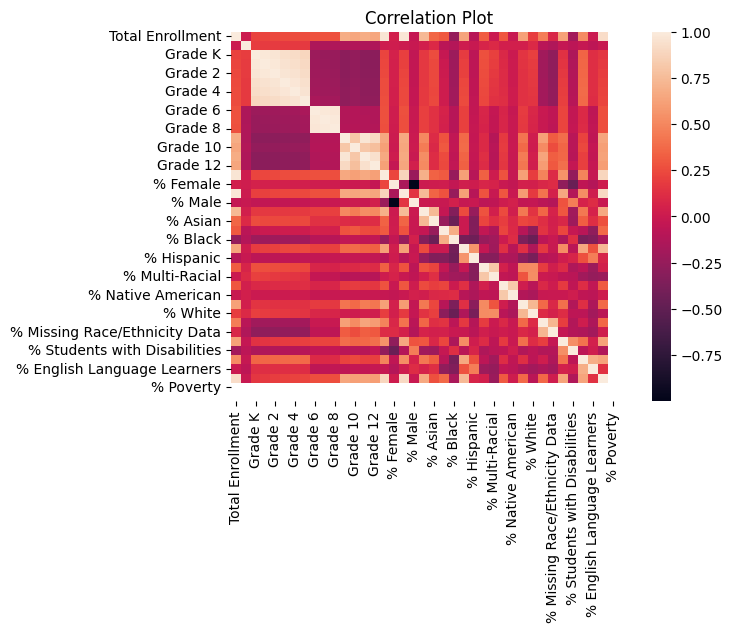

In [17]:
columns_to_convert=["Total Enrollment", "Grade 3K+PK (Half Day & Full Day)", "Grade K", "Grade 1", "Grade 2", "Grade 3", "Grade 4", "Grade 5", "Grade 6", "Grade 7", "Grade 8", "Grade 9", "Grade 10", "Grade 11", "Grade 12", "# Female", "% Female", "# Male", "% Male", "# Asian", "% Asian", "# Black", "% Black", "# Hispanic", "% Hispanic", "# Multi-Racial", "% Multi-Racial", "# Native American", "% Native American", "# White", "% White", "# Missing Race/Ethnicity Data", "% Missing Race/Ethnicity Data", "# Students with Disabilities", "% Students with Disabilities", "# English Language Learners", "% English Language Learners", "# Poverty", "% Poverty", "Economic Need Index"]
for column in columns_to_convert:
    df_review2[column] = pd.to_numeric(df_review2[column], errors='coerce')#to get numeric to be able to make chart

corr_matrix = df_review2[columns_to_convert].corr()
sns.heatmap(corr_matrix)
plt.title('Correlation Plot')
plt.show()

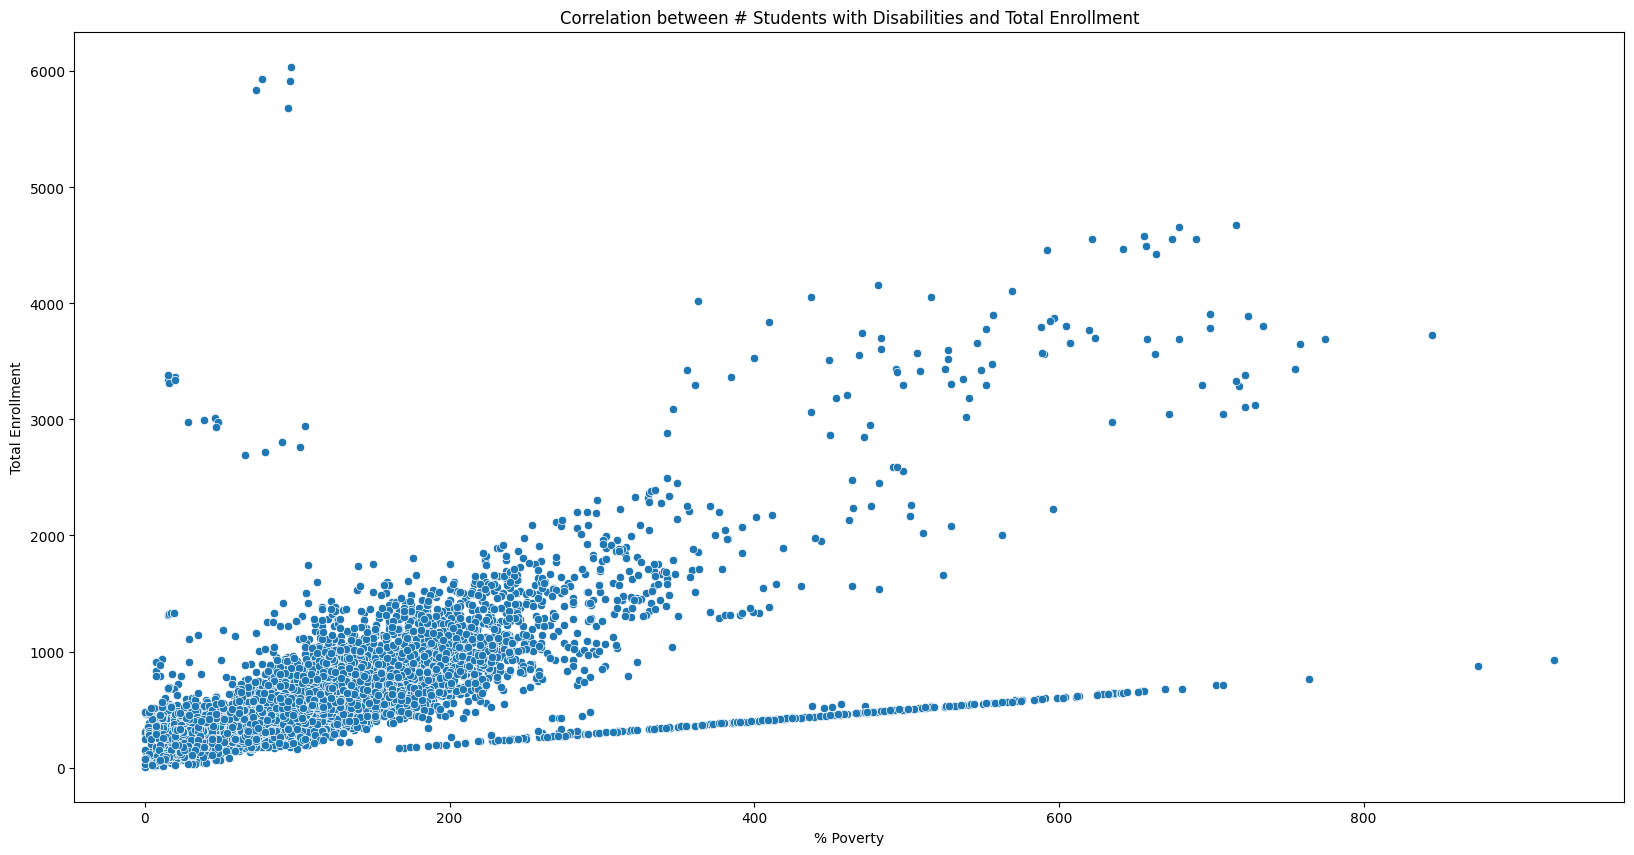

In [18]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=df_review, x='# Students with Disabilities', y='Total Enrollment')
plt.title('Correlation between # Students with Disabilities and Total Enrollment')
plt.xlabel('% Poverty')
plt.ylabel('Total Enrollment')
plt.show()